In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_context('talk')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
from datetime import timedelta
import datetime as dt
import scipy
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import pickle

from get_data.get_euromomo_data import get_euromomo_data
from get_data.get_data import get_ecdc_data,\
                        get_data_UK,\
                        get_data_Spain, \
                        get_data_Austria, \
                        get_data_Malta, \
                        get_data_Italy, \
                        get_data_Belgium,\
                        get_data_France, \
                        get_data_Portugal, \
                        get_data_Berlin,\
                        get_data_Norway,\
                        get_data_Netherlands,\
                        get_data_Denmark,\
                        get_data_Switzerland,\
                        get_data_Ireland,\
                        get_data_Greece,\
                        get_data_Luxemburg,\
                        get_data_Estonia,\
                        get_data_Sweden,\
                        get_data_Hesse

## Get ECDC data and group all Europe

In [2]:
ecdc_data=get_ecdc_data(continent='Europe')
ecdc_europe=ecdc_data.groupby(by='date',as_index=False).sum()
ecdc_europe.deaths.clip(0,inplace=True)
ecdc_europe['state']='Europe'
ecdc_europe['datasource']='ecdc.europa.eu'




## Print list of countries in ECDC Europe

In [3]:

from pprint import pprint
countries=(str(ecdc_data.state.unique())).strip('[]')
print('Countries in this data set:\n', countries)


Countries in this data set:
 'Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Faroe_Islands' 'Finland' 'France' 'Georgia'
 'Germany' 'Gibraltar' 'Greece' 'Guernsey' 'Holy_See' 'Hungary' 'Iceland'
 'Ireland' 'Isle_of_Man' 'Italy' 'Jersey' 'Kosovo' 'Latvia'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco'
 'Montenegro' 'Netherlands' 'North_Macedonia' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russia' 'San_Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Ukraine' 'United Kingdom'


# Get data for individual Euromomo countries

In [4]:
countries=['Austria', 'Belgium', 'Denmark', 'Estonia', 'Finland', 'France','Greece', 'Hungary','Ireland', 
           'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 
           'Switzerland', 'UK','Germany (Berlin)','Germany (Hesse)']





FI=ecdc_data[ecdc_data.state=='Finland']

HU=ecdc_data[ecdc_data.state=='Hungary']

ES=get_data_Spain()
AT=get_data_Austria()
MT=get_data_Malta()
IT=get_data_Italy()
BE=get_data_Belgium()
FR=get_data_France()
PT=get_data_Portugal()
Berlin=get_data_Berlin()
NO=get_data_Norway()
NL=get_data_Netherlands()
DK=get_data_Denmark()
CH=get_data_Switzerland()
IE=get_data_Ireland()
GR=get_data_Greece()
LU=get_data_Luxemburg()
EE=get_data_Estonia()
SE=get_data_Sweden()
Hesse=get_data_Hesse()
UK=get_data_UK()

df=pd.concat([FI,HU,ES,AT,MT,IT,BE,FR,PT,Berlin,
              NO,NL,DK,CH,IE,GR,LU,EE,SE,Hesse,UK])


if len(countries)==len(df.state.unique()):
    print('All Euromomo countries done')
else: print('Something is wrong')

# Convert all timestamps to same time zone
df['date']=pd.to_datetime(df.date,utc=True)
# Get list of countries and datasource



All Euromomo countries done


In [5]:
# Inspect dataframe 
df

,date,state,positive,deaths,datasource,total
16006,2020-10-16 00:00:00+00:00,Finland,291,0,ecdc.europa.eu,NaN
16007,2020-10-15 00:00:00+00:00,Finland,204,4,ecdc.europa.eu,NaN
16008,2020-10-14 00:00:00+00:00,Finland,287,0,ecdc.europa.eu,NaN
16009,2020-10-13 00:00:00+00:00,Finland,632,0,ecdc.europa.eu,NaN
16010,2020-10-12 00:00:00+00:00,Finland,0,0,ecdc.europa.eu,NaN
...,...,...,...,...,...,...
283,2020-01-07 00:00:00+00:00,United Kingdom,0,0,coronavirus.data.gov.uk,NaN
284,2020-01-06 00:00:00+00:00,United Kingdom,0,0,coronavirus.data.gov.uk,NaN
285,2020-01-05 00:00:00+00:00,United Kingdom,0,0,coronavirus.data.gov.uk,NaN
286,2020-01-04 00:00:00+00:00,United Kingdom,0,0,coronavirus.data.gov.uk,NaN


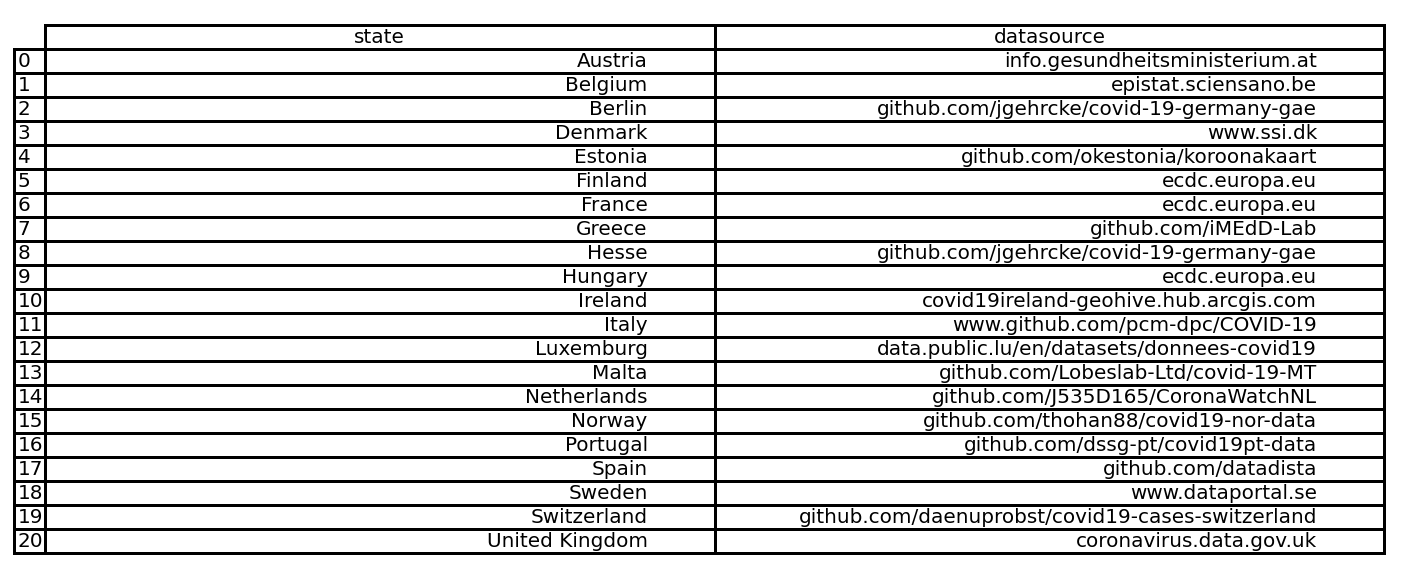

In [6]:
datasources=df.drop_duplicates('state',ignore_index=True)
datasources=datasources[['state','datasource']]
datasources=datasources.sort_values(by='state').reset_index()
# Get only relevant columns

## Output the list of data sources

fig, ax = plt.subplots(figsize=(12, 5)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False) 

fig=pd.plotting.table(ax,datasources[['state','datasource']],loc='upper right')  # where df is your data frame
fig.set_fontsize(30)

plt.savefig('plots/Euromomo_data_sources.png',dpi=200)



In [7]:

# Now group by date
df=df[['date','positive','deaths','total']].groupby(by='date',as_index=False).sum()

In [8]:
df


,date,positive,deaths,total
0,2019-12-31 00:00:00+00:00,0.000000,0.0,0.0
1,2020-01-01 00:00:00+00:00,0.000000,0.0,0.0
2,2020-01-02 00:00:00+00:00,0.000000,0.0,0.0
3,2020-01-03 00:00:00+00:00,0.000000,0.0,0.0
4,2020-01-04 00:00:00+00:00,0.000000,0.0,0.0
...,...,...,...,...
286,2020-10-12 00:00:00+00:00,66707.333333,290.0,644749.0
287,2020-10-13 00:00:00+00:00,62812.000000,487.0,611049.0
288,2020-10-14 00:00:00+00:00,71134.000000,615.0,519894.0
289,2020-10-15 00:00:00+00:00,80244.000000,555.0,478435.0


# Get EU/EEA & UK test and other data

In [10]:
# Get EU/EEA & UK Tests

from get_data.get_data_ecdc import get_data_ecdc_tests

EUtestdf=get_data_ecdc_tests()

# Get other data only for only EU/EEA & UK 
ecdc_EUtest=ecdc_data[ecdc_data.state.isin(list(EUtestdf.country.unique()))]

#from pprint import pprint
countries=(str(ecdc_EUtest.state.unique())).strip('[]')
print('EU cases & deaths: Countries in this data set:\n', countries)

ecdc_EUtest=ecdc_EUtest.groupby(by='date',as_index=False).sum()
ecdc_EUtest.deaths.clip(0,inplace=True)
ecdc_EUtest['state']='EU/EEA & UK'
ecdc_EUtest['datasource']='ecdc.europa.eu'
ecdc_EUtest['positive_avg']=ecdc_EUtest.positive.rolling(window=7,center=True).mean()

print('EU tests: Countries in this data set:\n', (str(EUtestdf.country.unique())).strip('[]'))

#EUtest['date']=pd.to_datetime(EUtest.date)
EUtest=EUtestdf.groupby('year_week',as_index=False).sum()

#(EUtest['year_week'].apply(str)).strip()

EUtest['date']=pd.to_datetime(EUtestdf.year_week.add('-0'), format='%Y-W%W-%w')-dt.timedelta(5)

from dataframe_utilities import ECDC_week2day

EUtestdaily=ECDC_week2day(EUtest,'tests_done','dailytests')
EUtestdaily['dailytestsavg']=EUtestdaily.dailytests.rolling(window=7,center=True).mean()

EU cases & deaths: Countries in this data set:
 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'United Kingdom'
EU tests: Countries in this data set:
 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'United Kingdom'


In [11]:
EUtestdaily

,date,dailytests,dailytestsavg
0,2020-02-26,1.285714,NaN
1,2020-02-27,1.285714,NaN
2,2020-02-28,1.285714,NaN
3,2020-02-29,1.285714,1.285714
4,2020-03-01,1.285714,1.387755
...,...,...,...
219,2020-10-02,654152.000000,647836.877551
220,2020-10-03,654152.000000,654152.000000
221,2020-10-04,654152.000000,NaN
222,2020-10-05,654152.000000,NaN


## Estimate false positives


In [12]:
EUtestdaily=(pd.merge(EUtestdaily,ecdc_EUtest,on='date',how='outer')).reset_index(drop=True)

In [13]:
EUtestdaily.sort_values(by='date',inplace=True)

In [14]:
EUtestdaily

,date,dailytests,dailytestsavg,positive,deaths,state,datasource,positive_avg
224,2019-12-31,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
225,2020-01-01,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
226,2020-01-02,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
227,2020-01-03,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,0.000000
228,2020-01-04,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,0.000000
...,...,...,...,...,...,...,...,...
286,2020-10-12,NaN,NaN,91459,571,EU/EEA & UK,ecdc.europa.eu,89967.714286
287,2020-10-13,NaN,NaN,72990,524,EU/EEA & UK,ecdc.europa.eu,92235.571429
288,2020-10-14,NaN,NaN,93377,884,EU/EEA & UK,ecdc.europa.eu,NaN
289,2020-10-15,NaN,NaN,110850,853,EU/EEA & UK,ecdc.europa.eu,NaN


In [15]:
EU_cases_deaths_tests_fpr=EUtestdaily.rename(columns={'dailytests':'total'})
#EU_cases_deaths_tests_fpr.to_pickle("./EU_EEA_UK_df.pkl")

In [16]:
from rogan_gladen.mk_hpd import mk_hpd
from rogan_gladen.mk_true_positive import mk_true_positive

df_for_fpr=pd.DataFrame({'date':EUtestdaily.date,'positive':EUtestdaily.positive_avg,
                        'total':EUtestdaily.dailytestsavg})
df_for_fpr.dropna(inplace=True)
df_for_fpr.drop(df_for_fpr[df_for_fpr.total<df_for_fpr.positive].index,inplace=True)
                        


In [17]:
df_for_fpr

,date,positive,total
67,2020-05-03,11810.428571,15439.510204
68,2020-05-04,11787.714286,21592.591837
69,2020-05-05,11315.714286,27745.673469
70,2020-05-06,11095.285714,33898.755102
71,2020-05-07,11090.000000,40051.836735
...,...,...,...
216,2020-09-29,48421.571429,628891.510204
217,2020-09-30,48885.571429,635206.632653
218,2020-10-01,51135.571429,641521.755102
219,2020-10-02,52678.142857,647836.877551


In [18]:
obs_positive_trace,data=mk_true_positive(df_for_fpr)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sp, se, pi]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1298 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [19]:
EU_true=mk_hpd(obs_positive_trace,data)

/Users/ivandebono/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


In [20]:
EU_true

,date,positive,total,true_incidence,true_positive,true_positive_low,true_positive_high
0,2020-05-09,11172.918367,33898.755102,0.309623,10495.820423,9405.487698,11197.242621
1,2020-05-10,10953.163265,40536.997085,0.244211,9899.573695,8652.387543,10881.867679
2,2020-05-11,10616.673469,47660.399417,0.191379,9121.181988,7945.415067,10725.406824
3,2020-05-12,10299.346939,55268.962099,0.148640,8215.182289,5938.290266,9417.418260
4,2020-05-13,9945.714286,63362.685131,0.116723,7395.860490,5754.820726,9910.369152
...,...,...,...,...,...,...,...
143,2020-09-29,46818.571429,606874.545190,0.042149,25578.917887,16092.386113,48517.164299
144,2020-09-30,47347.959184,614725.466472,0.040626,24973.620459,898.475689,33560.143375
145,2020-10-01,48089.510204,622064.454810,0.041929,26082.695836,14761.295333,48685.786873
146,2020-10-02,48946.244898,628891.510204,0.040200,25281.619069,40.705259,34861.236657


In [21]:

#pickle.dump(EU_true, open( "EUtrue.p", "wb" ) )


In [22]:
EUtestdailyfpr=EUtestdaily.merge(EU_true,on='date',how='outer')

In [23]:
EUtestdaily

,date,dailytests,dailytestsavg,positive,deaths,state,datasource,positive_avg
224,2019-12-31,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
225,2020-01-01,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
226,2020-01-02,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,NaN
227,2020-01-03,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,0.000000
228,2020-01-04,NaN,NaN,0,0,EU/EEA & UK,ecdc.europa.eu,0.000000
...,...,...,...,...,...,...,...,...
286,2020-10-12,NaN,NaN,91459,571,EU/EEA & UK,ecdc.europa.eu,89967.714286
287,2020-10-13,NaN,NaN,72990,524,EU/EEA & UK,ecdc.europa.eu,92235.571429
288,2020-10-14,NaN,NaN,93377,884,EU/EEA & UK,ecdc.europa.eu,NaN
289,2020-10-15,NaN,NaN,110850,853,EU/EEA & UK,ecdc.europa.eu,NaN


/Users/ivandebono/Desktop/Covid19Toolkit/get_plots.py:122: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


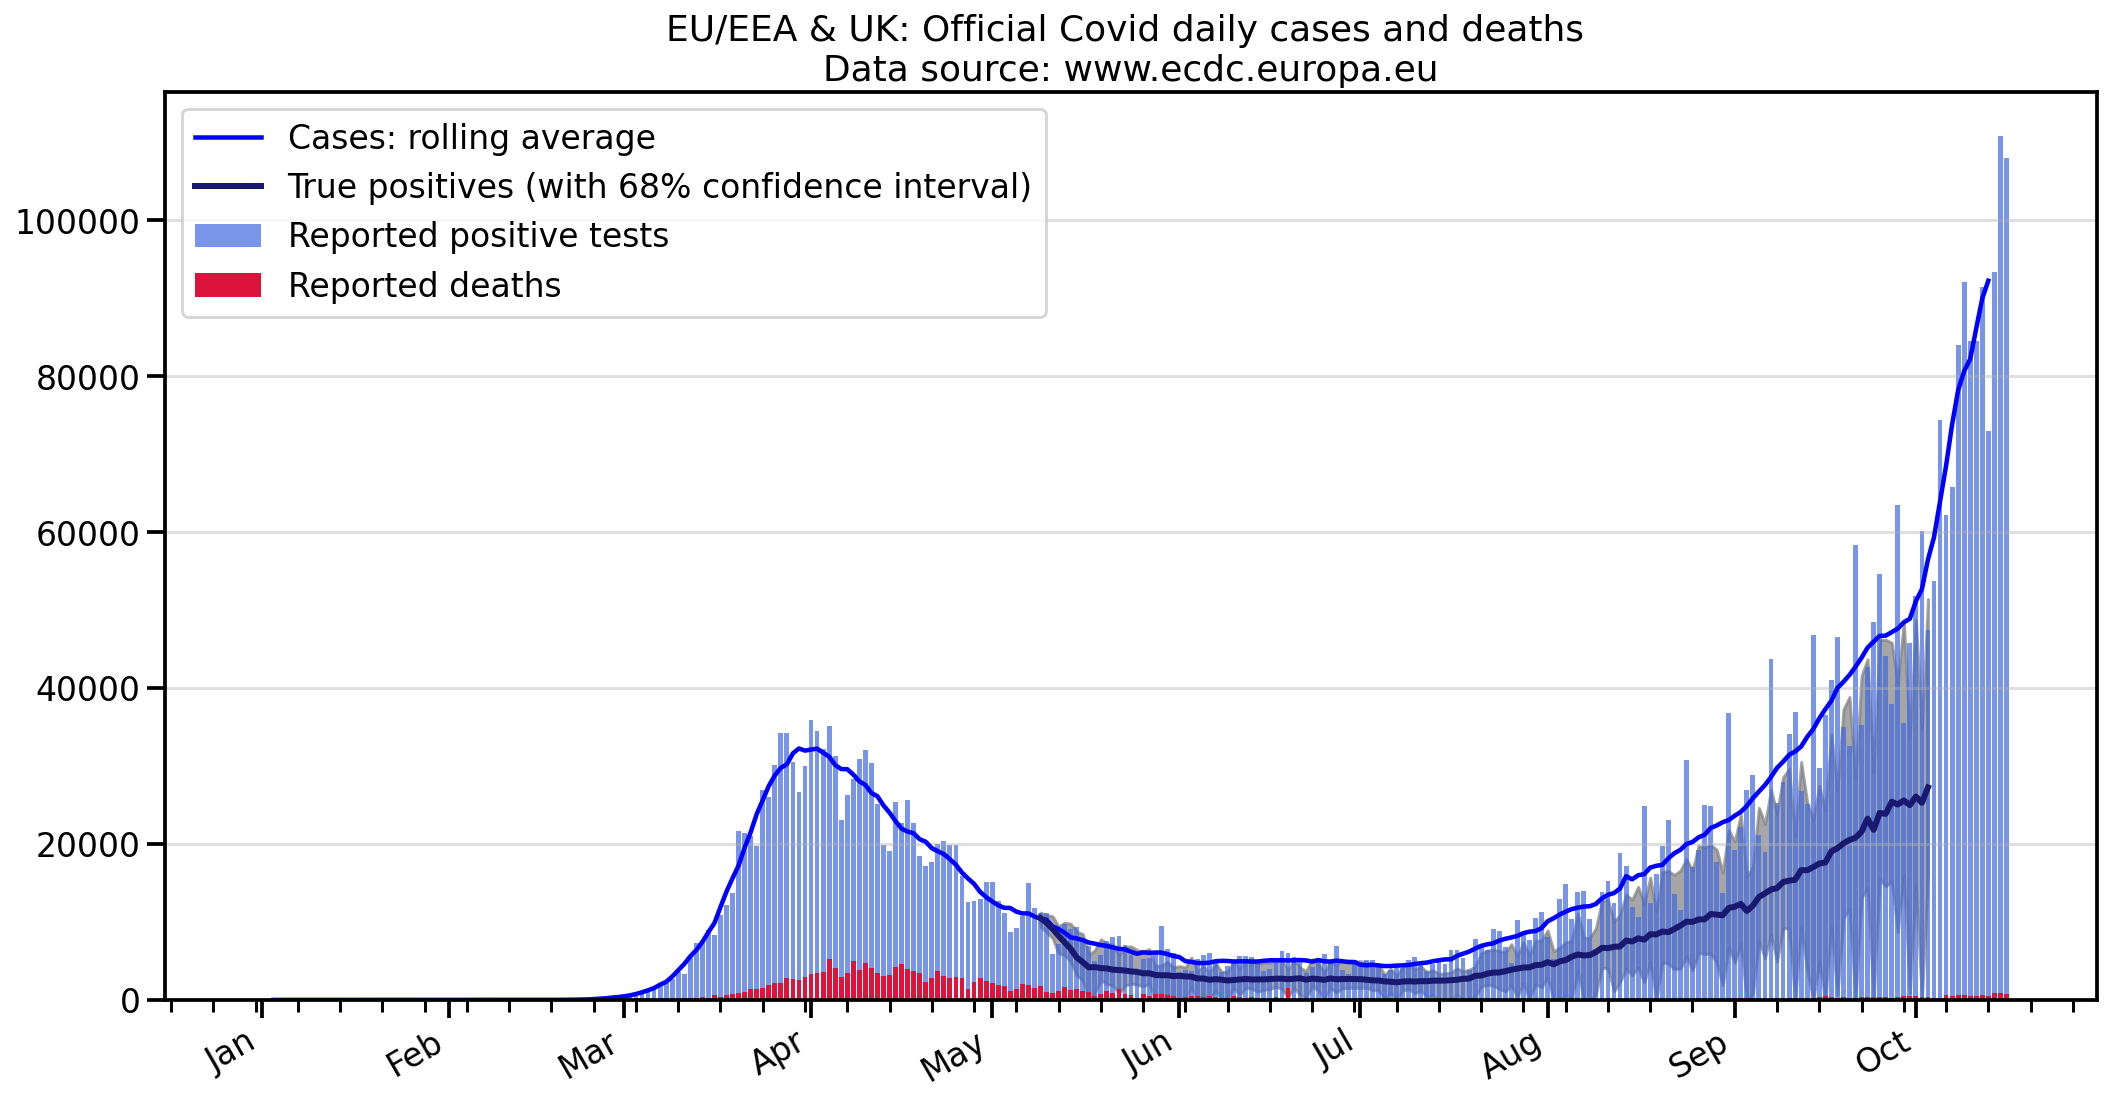

In [24]:
from get_plots import plot_fpr

plot_fpr(EUtestdaily,EUtestdailyfpr,country='EU/EEA & UK',
           datasource='Data source: www.ecdc.europa.eu',mynotes=True) #.plot(x='date',y=['positive','falsepositive','truepositive'])

/Users/ivandebono/Desktop/Covid19Toolkit/get_plots.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


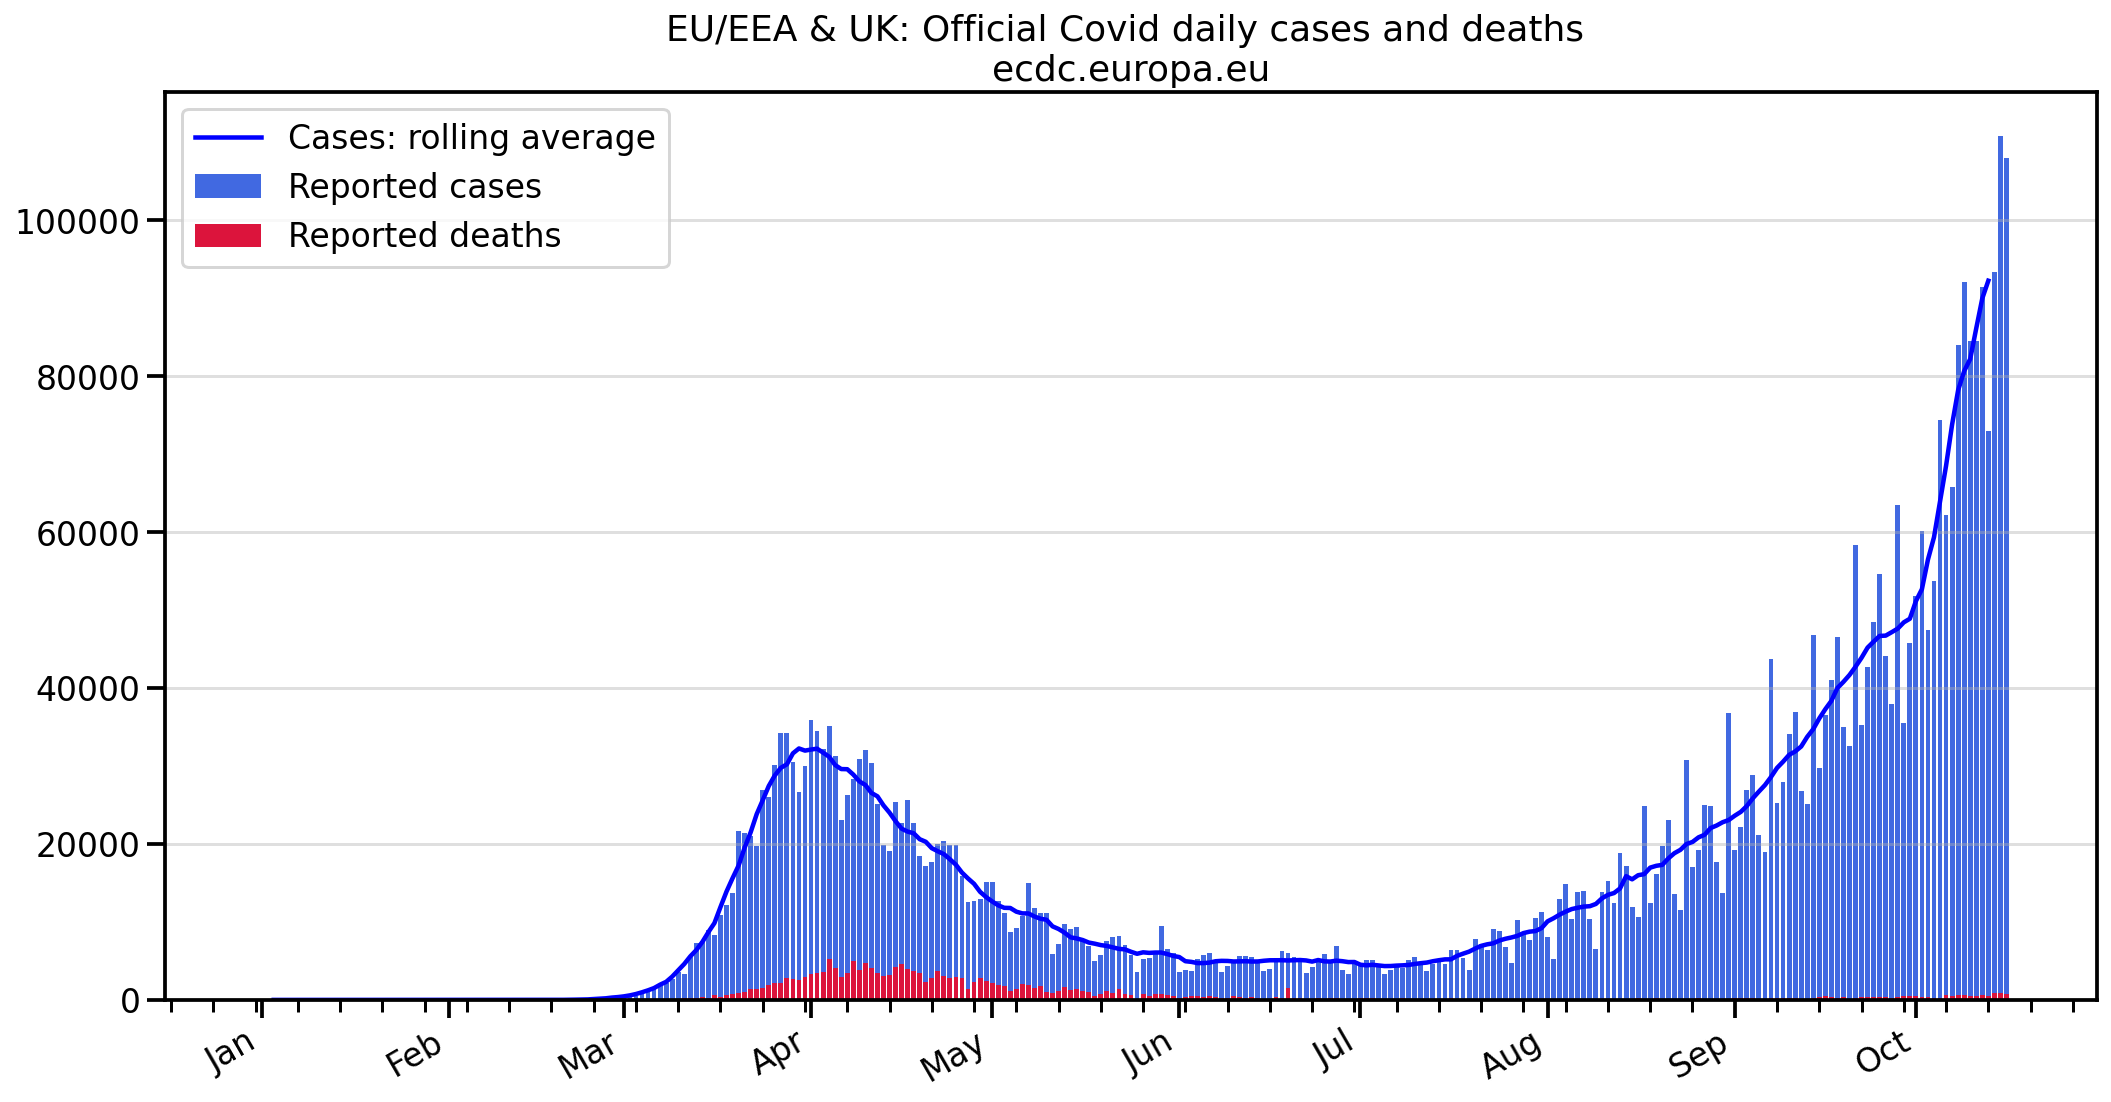

In [25]:

from get_plots import mirrorplot,mirrorplot_withtest
mirrorplot(ecdc_EUtest,state='EU/EEA & UK',
           datasource='Data: www.ecdc.europa.eu',mirror=False)
#mirrorplot(euromomo_all,state='Euromomo countries',datasource='(From respective national data sources)',mirror=False)



/Users/ivandebono/Desktop/Covid19Toolkit/get_plots.py:191: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


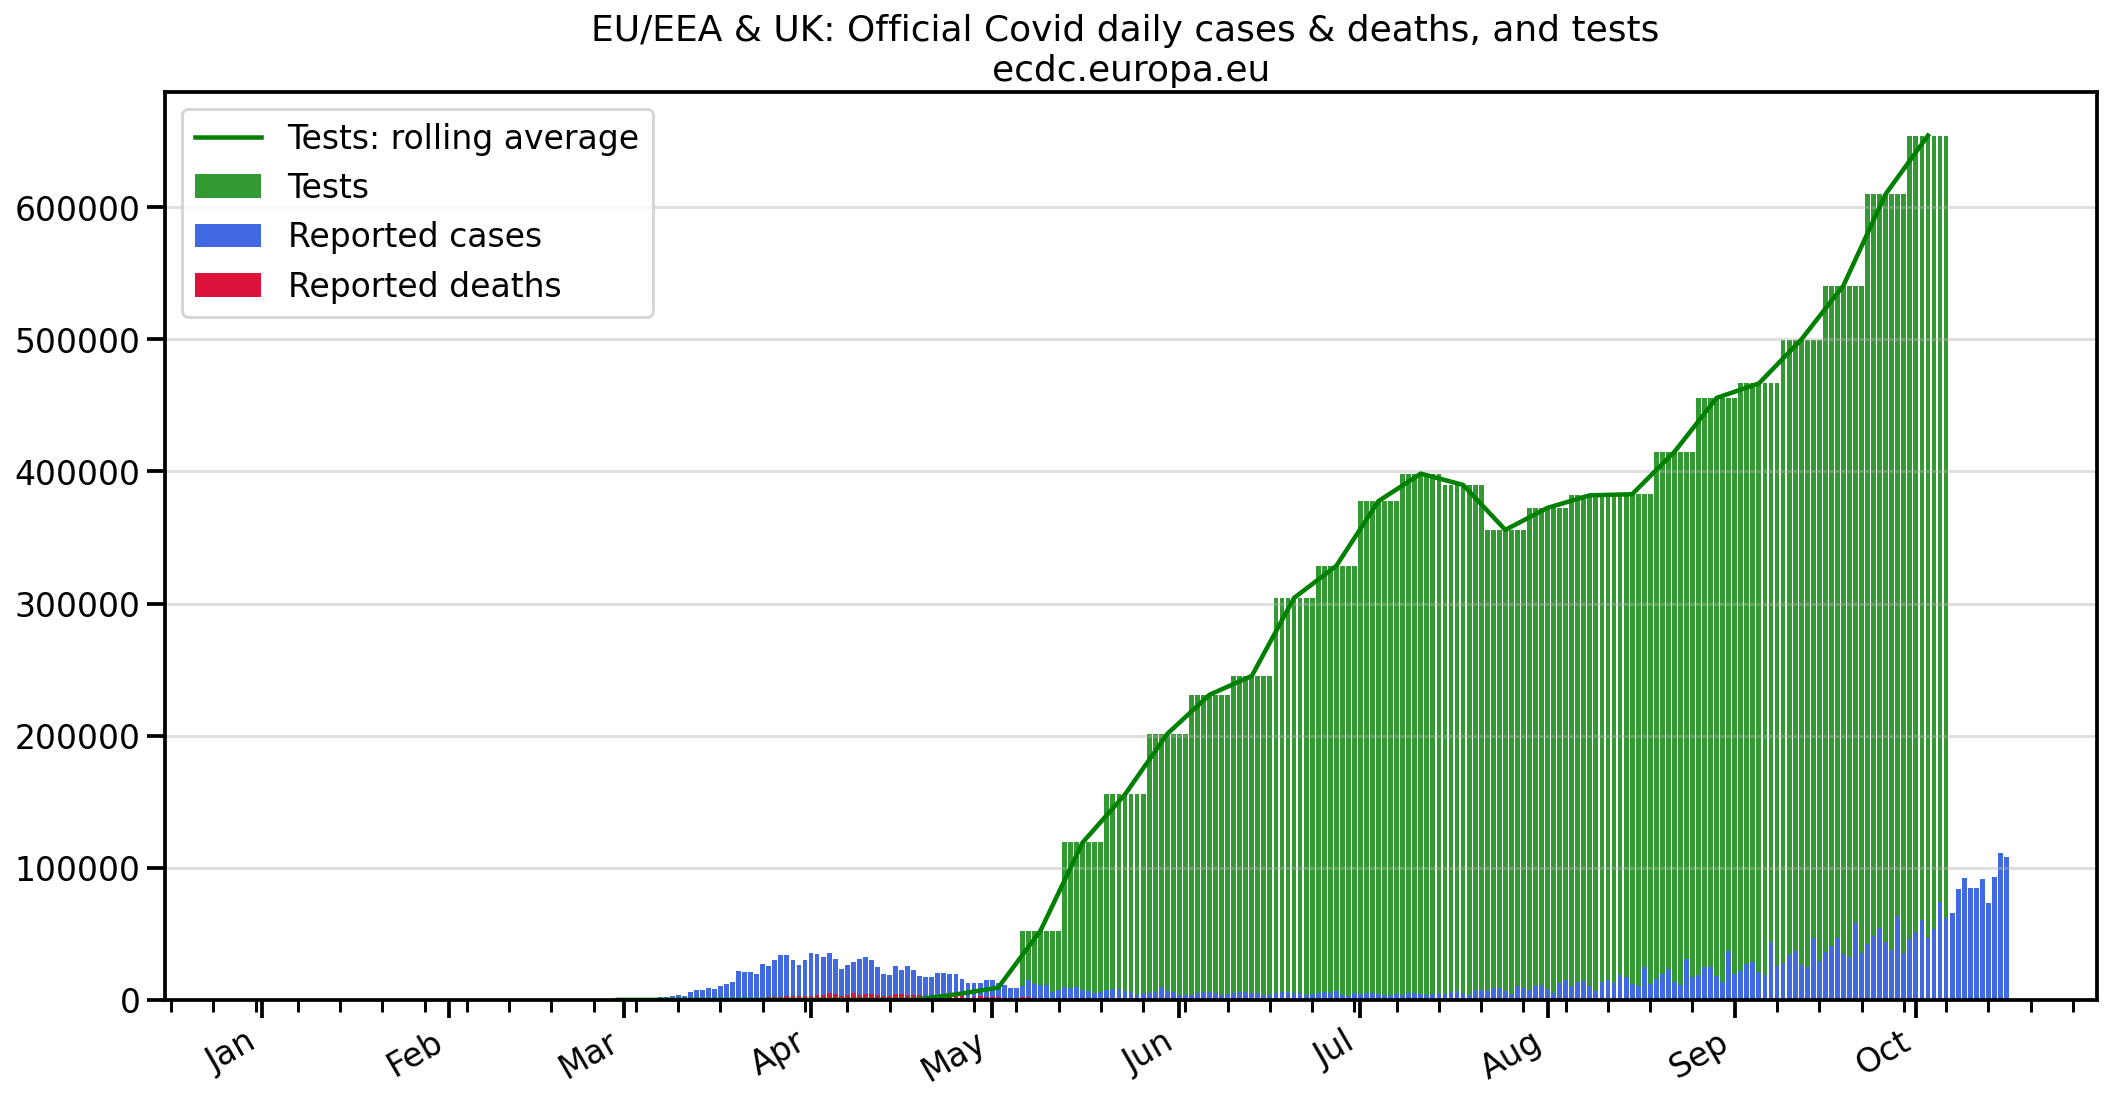

In [26]:
mirrorplot_withtest(ecdc_EUtest,EUtestdaily,state='EU/EEA & UK',
           datasource='Data: www.ecdc.europa.eu',mirror=False)

/Users/ivandebono/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


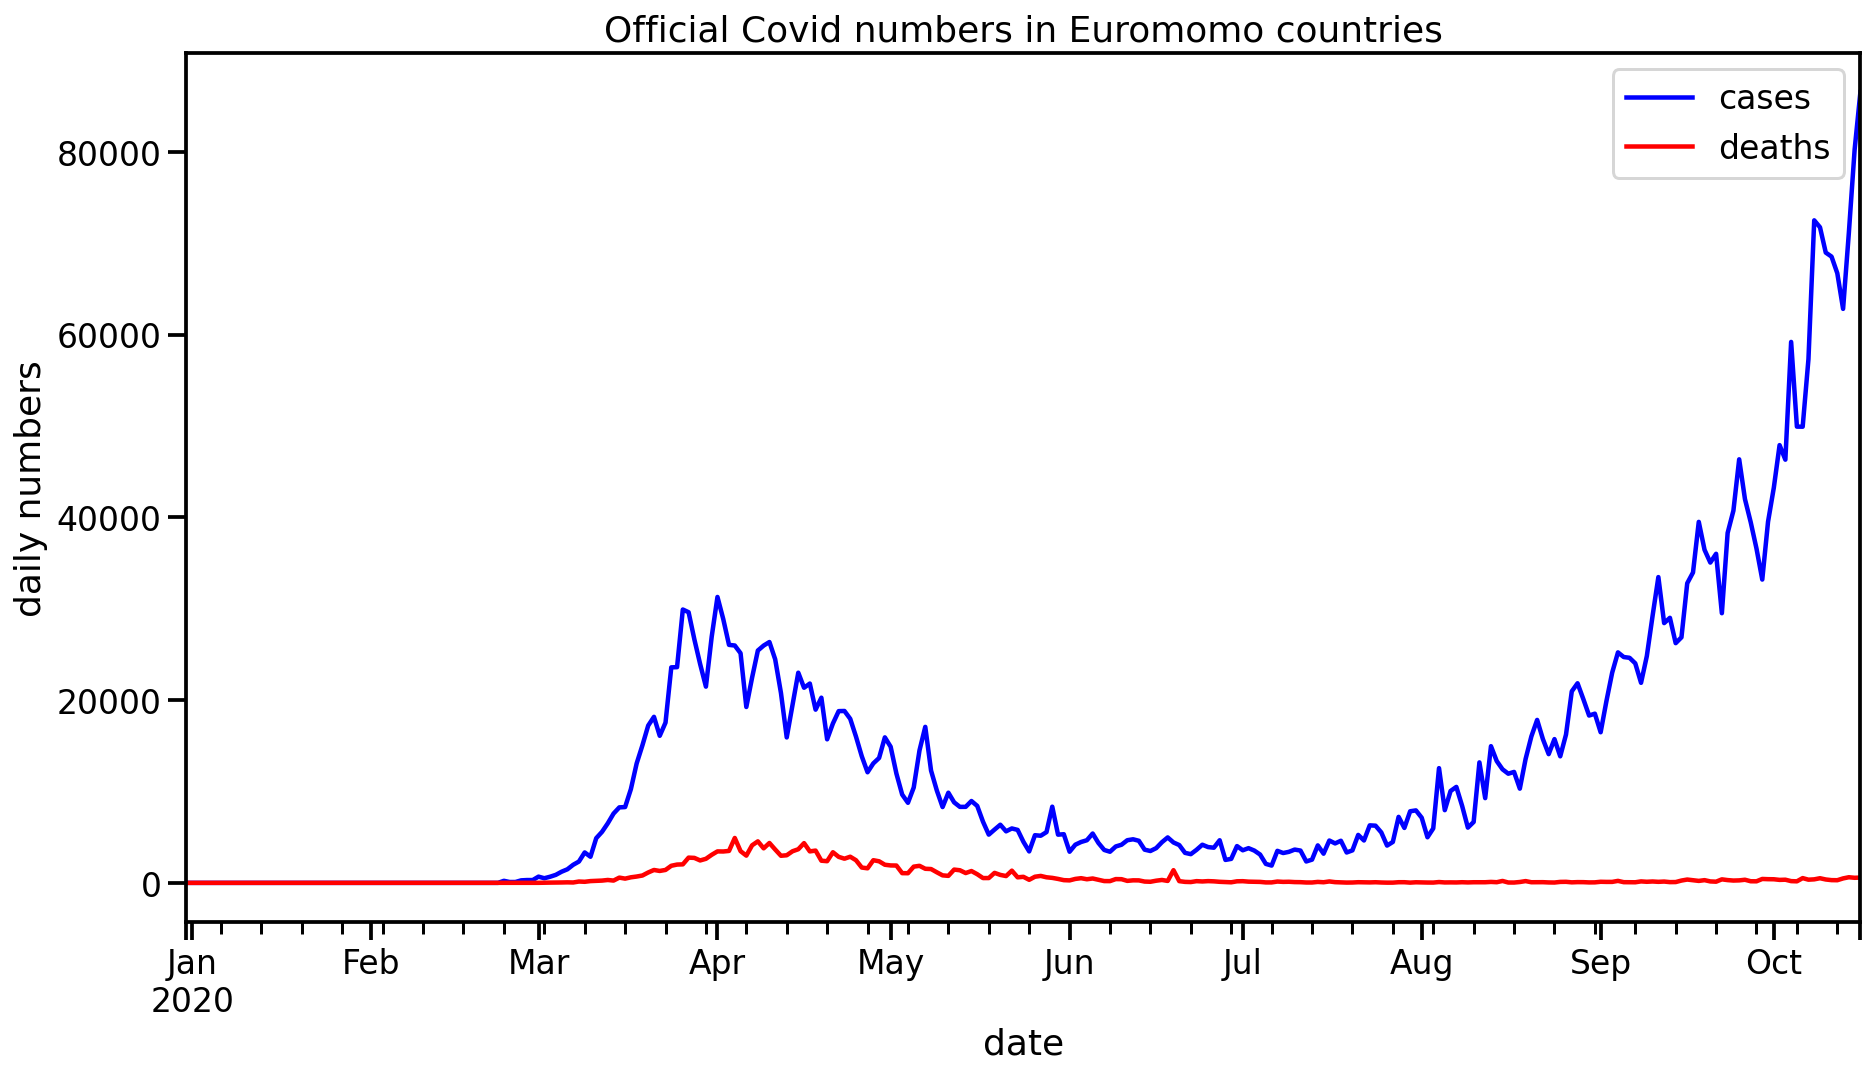

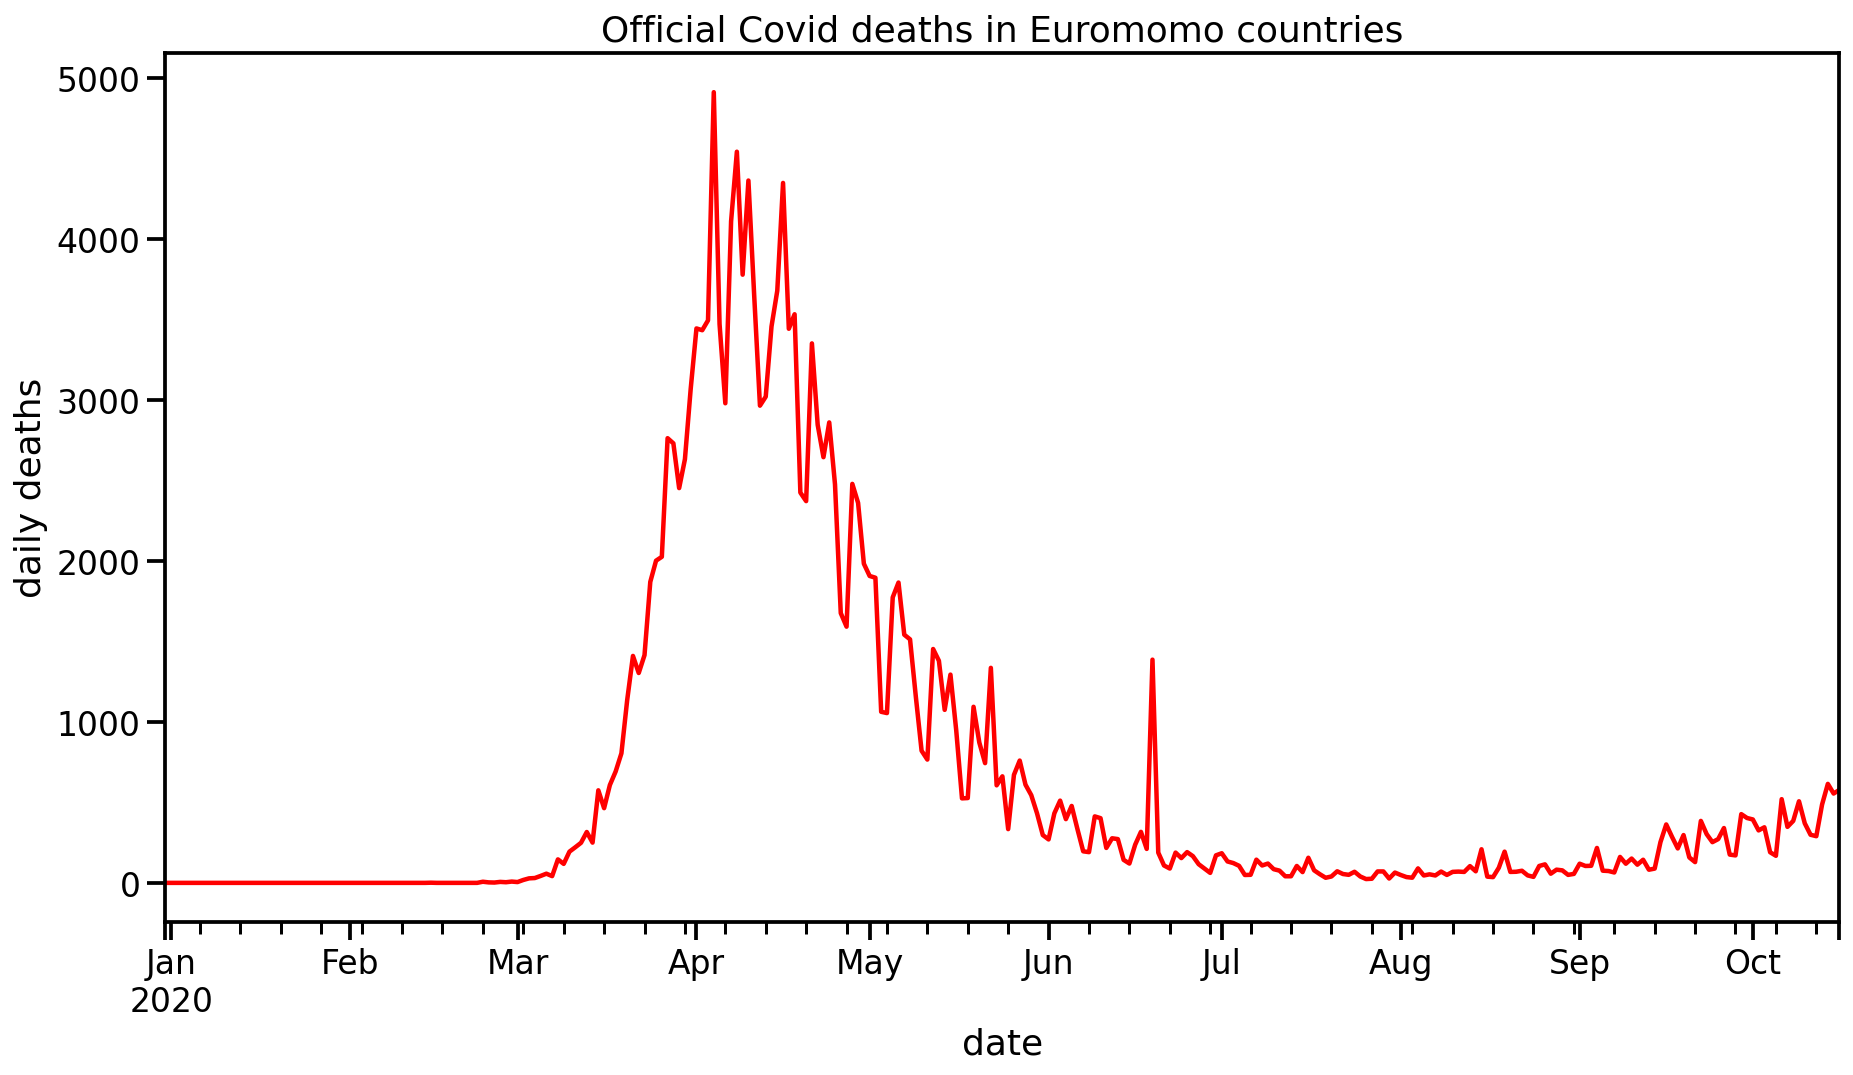

In [27]:
# Get total of Covid deaths
covid=df.groupby('date',as_index=False)[('deaths','positive')].agg('sum')
covid['date']=covid.date.dt.tz_localize(None)


fig, ax = plt.subplots(figsize=(15, 8))
plt.title('Official Covid numbers in Euromomo countries')
covid.plot(x='date',y='positive',ax=ax,color='blue',label='cases')#
covid.plot(x='date',y='deaths',ax=ax,color='red',label='deaths')#
plt.legend()
plt.ylabel('daily numbers')

fig.set_facecolor('w')

sns.despine;
plt.savefig('plots/OfficialCovid_CasesDeaths.png',dpi=250)
plt.show()


# Get total of Covid deaths
#covid=df.groupby('date',as_index=False)[('deaths','positive')].agg('sum')
#covid['date']=covid.date.dt.tz_localize(None)


fig, ax = plt.subplots(figsize=(15, 8))
plt.title('Official Covid deaths in Euromomo countries')

covid.plot(x='date',y='deaths',ax=ax,color='red',legend=False)#
#plt.legend()
plt.ylabel('daily deaths')

fig.set_facecolor('w')

sns.despine;
plt.savefig('plots/OfficialCovidDeaths.png',dpi=250)
plt.show()




In [28]:
#weekly deaths
covidweekly= covid.resample('W', on='date').sum()
covidweekly.reset_index(level=0, inplace=True)

# Get Euromomo data

In [29]:
data=get_euromomo_data()
data.tail()

Data source: https://www.euromomo.eu/component---src-templates-graphs-and-maps-js-315ac69ac6cd3d70e686.js


,date,deaths,baseline,baseline_upper,baseline_lower
195,2020-09-15,50076.25,48391.56,49516.89,47274.88
196,2020-09-22,51218.53,48752.79,49880.54,47633.66
197,2020-09-29,50106.95,49152.82,50284.13,48030.13
198,2020-10-06,50972.61,49586.83,50723.15,48459.13
199,2020-10-13,48958.76,50049.42,51192.46,48915.02


#  Plot Euromomo deaths & baseline graph

In [30]:
from scipy.signal import find_peaks, peak_prominences
peaks, _= find_peaks(data.deaths.values,prominence=10000)
troughs, _= find_peaks(-data.deaths.values,prominence=10000)
troughs=np.append(troughs,[data.index[-1]])
prominences = peak_prominences(data.deaths.values, peaks)[0]

contour_heights = data.deaths.iloc[peaks] - prominences

In [31]:
baseline_peaks, _= find_peaks(data.baseline.values,prominence=1000)
baseline_troughs, _= find_peaks(-data.baseline.values,prominence=1000)


baseline_prominences = peak_prominences(data.baseline.values, baseline_peaks)[0]

baseline_contour_heights = data.baseline.iloc[peaks] - baseline_prominences

In [32]:
baseline_peaks

array([  6,  58, 110, 163])

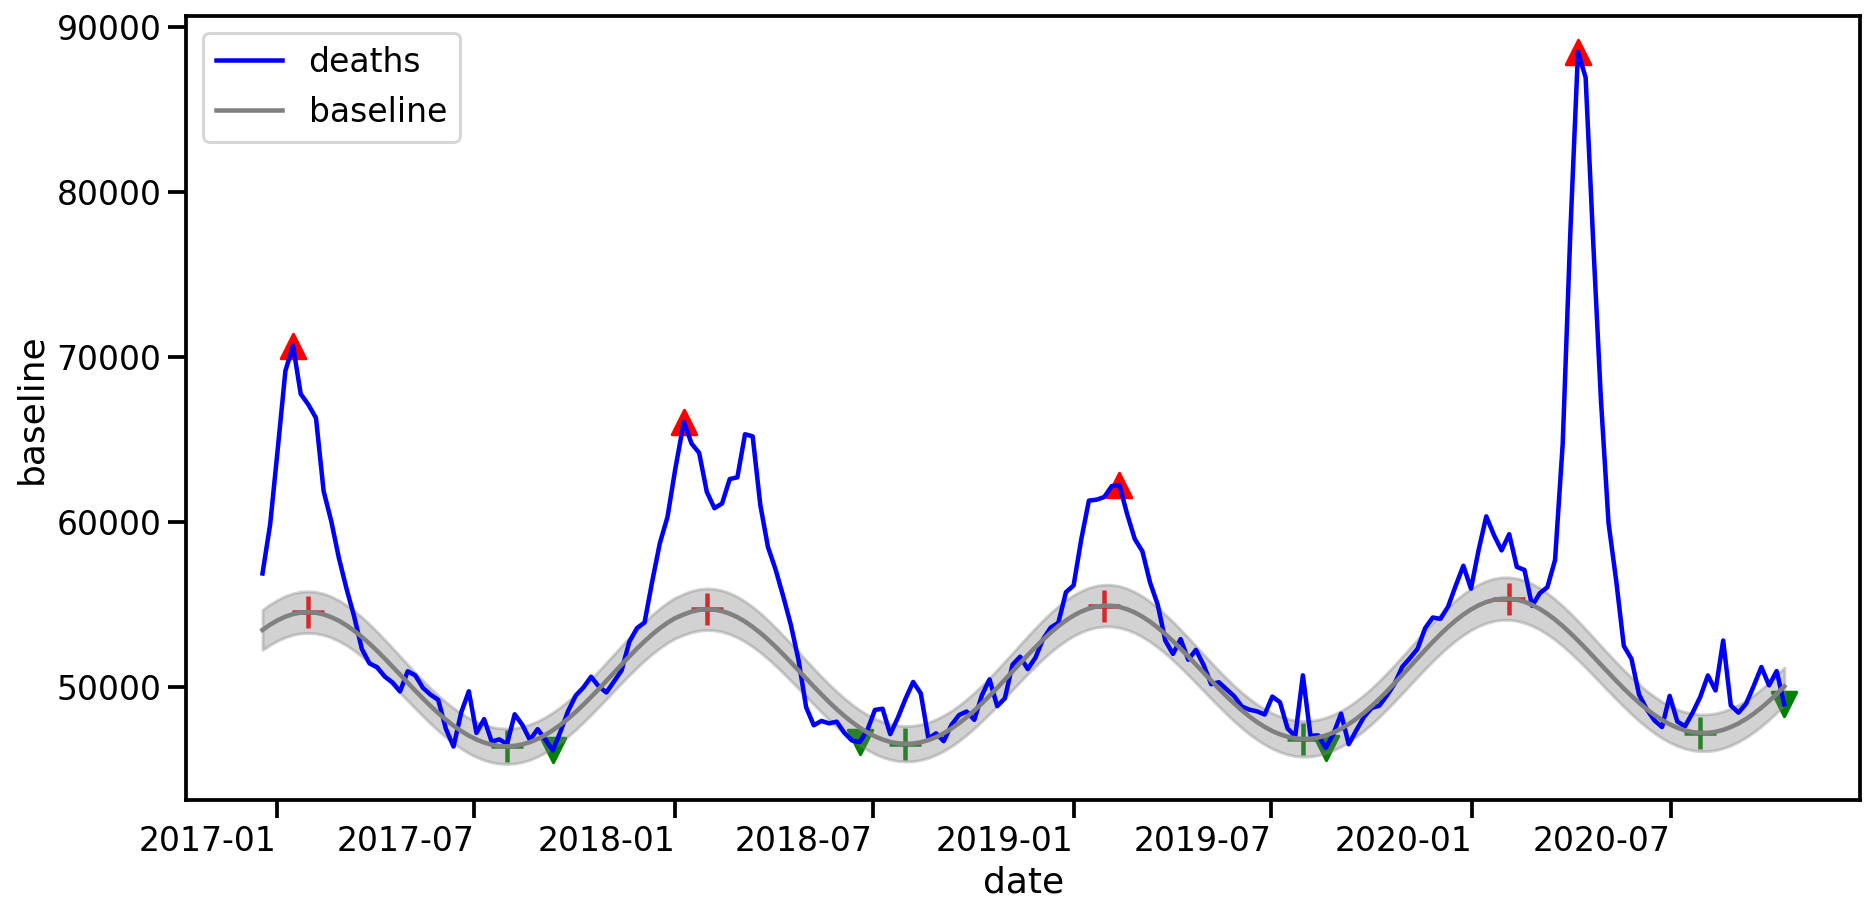

In [33]:

fig, ax = plt.subplots(figsize=(15, 8))
data.plot(x="date", y="deaths",color='blue',ax=ax)
data.loc[troughs].plot.scatter(x='date',y='deaths',marker='v',color='green',s=150,ax=ax)
data.loc[peaks].plot.scatter(x='date',y='deaths',marker='^',color='red',s=150,ax=ax)
data.plot(x='date',y='baseline',color='gray',ax=ax)

data.loc[baseline_troughs].plot.scatter(x='date',y='baseline',marker='+',color='green',s=250,ax=ax)
data.loc[baseline_peaks].plot.scatter(x='date',y='baseline',marker='+',color='red',s=250,ax=ax)

ax.fill_between(data.date,data.baseline_upper,data.baseline_lower, alpha=0.35,color='gray')

sns.despine;
plt.show()

In [34]:
#Find the cumulative sum of deaths in each peak

totaldeathsarray=[]

for i in np.arange(len(peaks)-1):
    totaldeaths=data.deaths.iloc[troughs[i]:troughs[i+1]].sum()
    totaldeathsarray.append(totaldeaths)

In [35]:
#Find the cumulative sum of deaths between troughs in the baseline


baseline_totaldeathsarray=[]


for i in np.arange(len(baseline_peaks)-1):
    baseline_totaldeaths=data.deaths.iloc[baseline_troughs[i]:baseline_troughs[i+1]].sum()
    baseline_totaldeathsarray.append(baseline_totaldeaths)

In [36]:
def weekdiff(start, end):
    days = pd.to_datetime(end) - pd.to_datetime(start)
    week = int(pd.Timedelta(days).days / 7)
    remainder = pd.Timedelta(days).days % 7
    #print(week)
    return week

trough_to_trough_interval=[]
intervaldates=[]

for i in np.arange(1,len(troughs)):

    trough_to_trough_interval.append(weekdiff(data.date.iloc[troughs[i-1]],data.date.iloc[troughs[i]]))
    intervaldates.append((data.date.iloc[troughs[i-1]].strftime("%d %b %Y") ,data.date.iloc[troughs[i]].strftime("%d %b %Y") ))

In [37]:
baseline_trough_to_trough_interval=[]
baseline_intervaldates=[]

for i in np.arange(1,len(baseline_troughs)):

    baseline_trough_to_trough_interval.append(weekdiff(data.date.iloc[baseline_troughs[i-1]],
                                                       data.date.iloc[baseline_troughs[i]]))
    baseline_intervaldates.append((data.date.iloc[baseline_troughs[i-1]].strftime("%d %b %Y") ,
                                   data.date.iloc[baseline_troughs[i]].strftime("%d %b %Y") ))

In [38]:
# Find the start and end points of the pandemic spike
pandemic=data[(data.date>pd.Timestamp('2020-02-26')) & (data.date<pd.Timestamp('2020-06-08'))]





data['noncovidbaseline']=data.deaths
data.loc[pandemic.index.values,'noncovidbaseline']=None

data['noncovidbaseline']=data['noncovidbaseline'].interpolate(method='akima')



In [45]:
from dataframe_utilities import insert_row
last_index=pandemic.index[-1]
first_index=pandemic.index[0]

pandemic=insert_row(first_index-1,pandemic,data.iloc[first_index-1])
pandemic=insert_row(last_index+1,pandemic,data.iloc[last_index+1])
pandemic.sort_index(inplace=True)

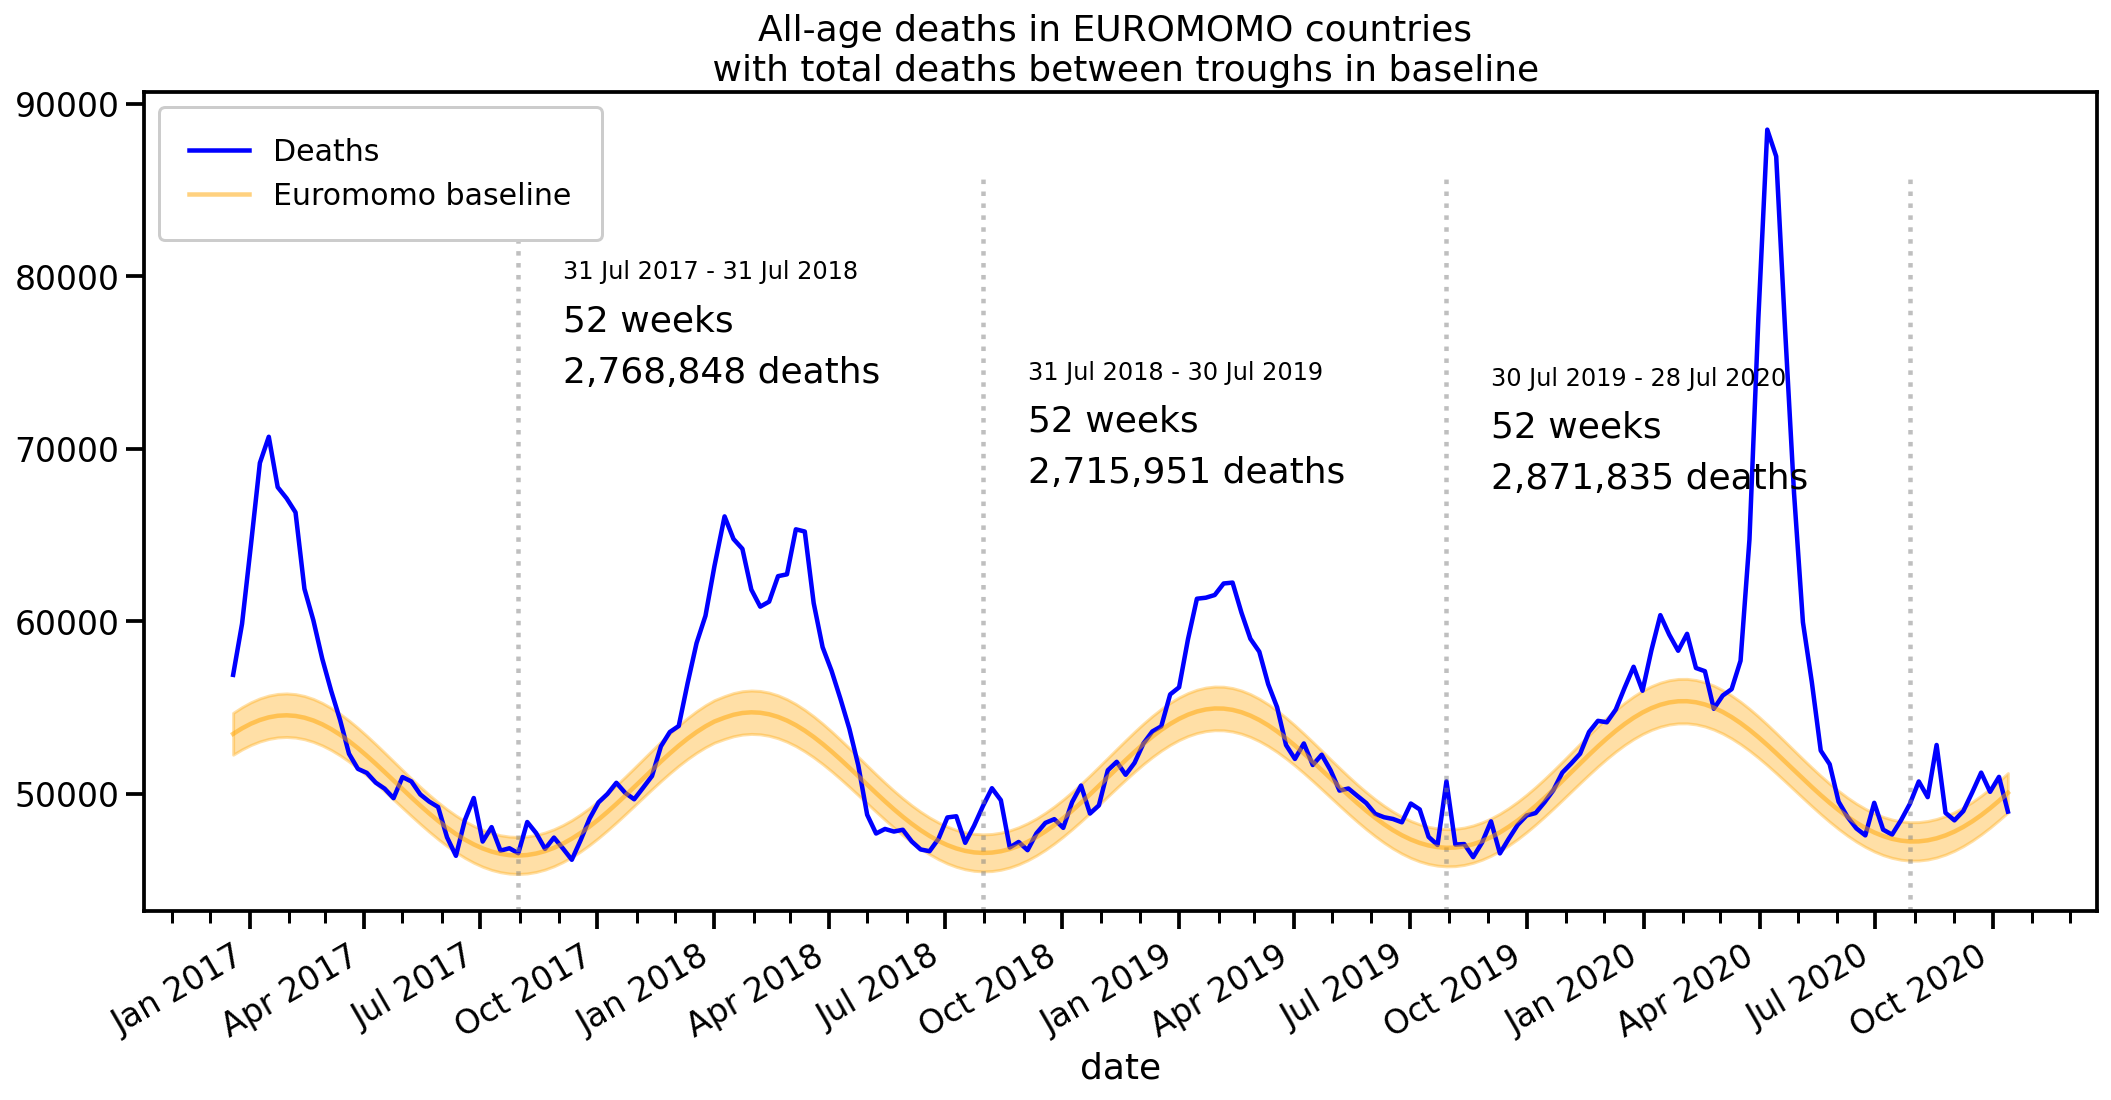

In [46]:

fig, ax = plt.subplots(figsize=(15, 8))

data.plot(x="date", y="deaths",color='blue',ax=ax,legend=True,label='Deaths')


wrtbaseline=True



if not wrtbaseline:
    
    plt.title('All-age deaths in EUROMOMO countries')

    for i in np.arange(len(troughs)):
        plt.axvline(data.date.iloc[troughs[i]],ymax=0.9,color='gray',alpha=0.5,linestyle=':')
    for i in np.arange(len(troughs)-1):
        ax.annotate('{} - {}'.format(intervaldates[i][0],intervaldates[i][1]), xy=(data.date.iloc[peaks[i]], data.deaths.iloc[troughs[i]]  ),
                    xytext=(data.date.iloc[troughs[i]+5], 1.05*data.deaths.iloc[peaks[i]]+6000),size=12)
        ax.annotate('{:,} weeks'.format(trough_to_trough_interval[i]), xy=(data.date.iloc[peaks[i]], data.deaths.iloc[troughs[i]]  ),
                    xytext=(data.date.iloc[troughs[i]+5], 1.05*data.deaths.iloc[peaks[i]]+3000))
        ax.annotate('{:,} deaths'.format(int(totaldeathsarray[i])), xy=(data.date.iloc[peaks[i]], data.deaths.iloc[troughs[i]]  ),
                    xytext=(data.date.iloc[troughs[i]+5], 1.05*data.deaths.iloc[peaks[i]]))
        
else:
    
    plt.title('All-age deaths in EUROMOMO countries \n with total deaths between troughs in baseline')
    
    for i in np.arange(len(baseline_troughs)):
        plt.axvline(data.date.iloc[baseline_troughs[i]],ymax=0.9,color='gray',alpha=0.5,linestyle=':')
    for i in np.arange(len(baseline_troughs)-1):
        ax.annotate('{} - {}'.format(baseline_intervaldates[i][0],baseline_intervaldates[i][1]),
                    xy=(data.date.iloc[baseline_peaks[i]], data.deaths.iloc[baseline_troughs[i]]  ),
                    xytext=(data.date.iloc[baseline_troughs[i]+5], 
                            1.1*data.deaths.iloc[baseline_peaks[i]]+6000),size=12)
        ax.annotate('{:,} weeks'.format(baseline_trough_to_trough_interval[i]),
                    xy=(data.date.iloc[baseline_peaks[i]], data.deaths.iloc[baseline_troughs[i]]  ),
                    xytext=(data.date.iloc[baseline_troughs[i]+5], 1.1*data.deaths.iloc[baseline_peaks[i]]+3000))
        ax.annotate('{:,} deaths'.format(int(baseline_totaldeathsarray[i])), 
                    xy=(data.date.iloc[baseline_peaks[i]], data.deaths.iloc[baseline_troughs[i]]  ),
                    xytext=(data.date.iloc[baseline_troughs[i]+5], 1.1*data.deaths.iloc[baseline_peaks[i]]))
            
    
#sns.set(font_scale=5) 
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})




ax.xaxis.set_major_locator(mdates.YearLocator())

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

ax.xaxis.set_minor_locator(mdates.MonthLocator())


#plt.vlines(x=data.date.iloc[peaks], ymin=contour_heights, ymax=data.deaths.iloc[peaks])

#ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.get_xaxis().set_tick_params(which='major', pad=5)

data.plot(x='date',y='baseline',color='orange',ax=ax,label='Euromomo baseline',alpha=0.5)

ax.fill_between(data.date,data.baseline_upper,data.baseline_lower, alpha=0.35,color='orange')


#x.plot(x="date", y="deaths",color='green',ax=ax,legend=False)


ax.legend(fancybox=True, framealpha=1, shadow=False, borderpad=1,loc='upper left',fontsize='small',facecolor='white')

fig.set_facecolor('w')

#plt.show()
plt.tight_layout();
sns.despine;


plt.savefig('plots/Euromomo_total_deaths.jpg',dpi=250)
 

In [47]:
totalcoviddeaths=(data.deaths-data.noncovidbaseline).cumsum()

euromomototalcoviddeaths=(pandemic.deaths-pandemic.baseline).cumsum()

data['euromomoexcess']=data.deaths-data.baseline
data['totalcoviddeaths']=pd.Series(totalcoviddeaths)
data['euromomototalcoviddeaths']=pd.Series(euromomototalcoviddeaths)


In [48]:
#data.merge(covidweekly,on='date',how='outer')

In [49]:

covidweekly['deathscumulative']=covidweekly.deaths.cumsum()


41147.19


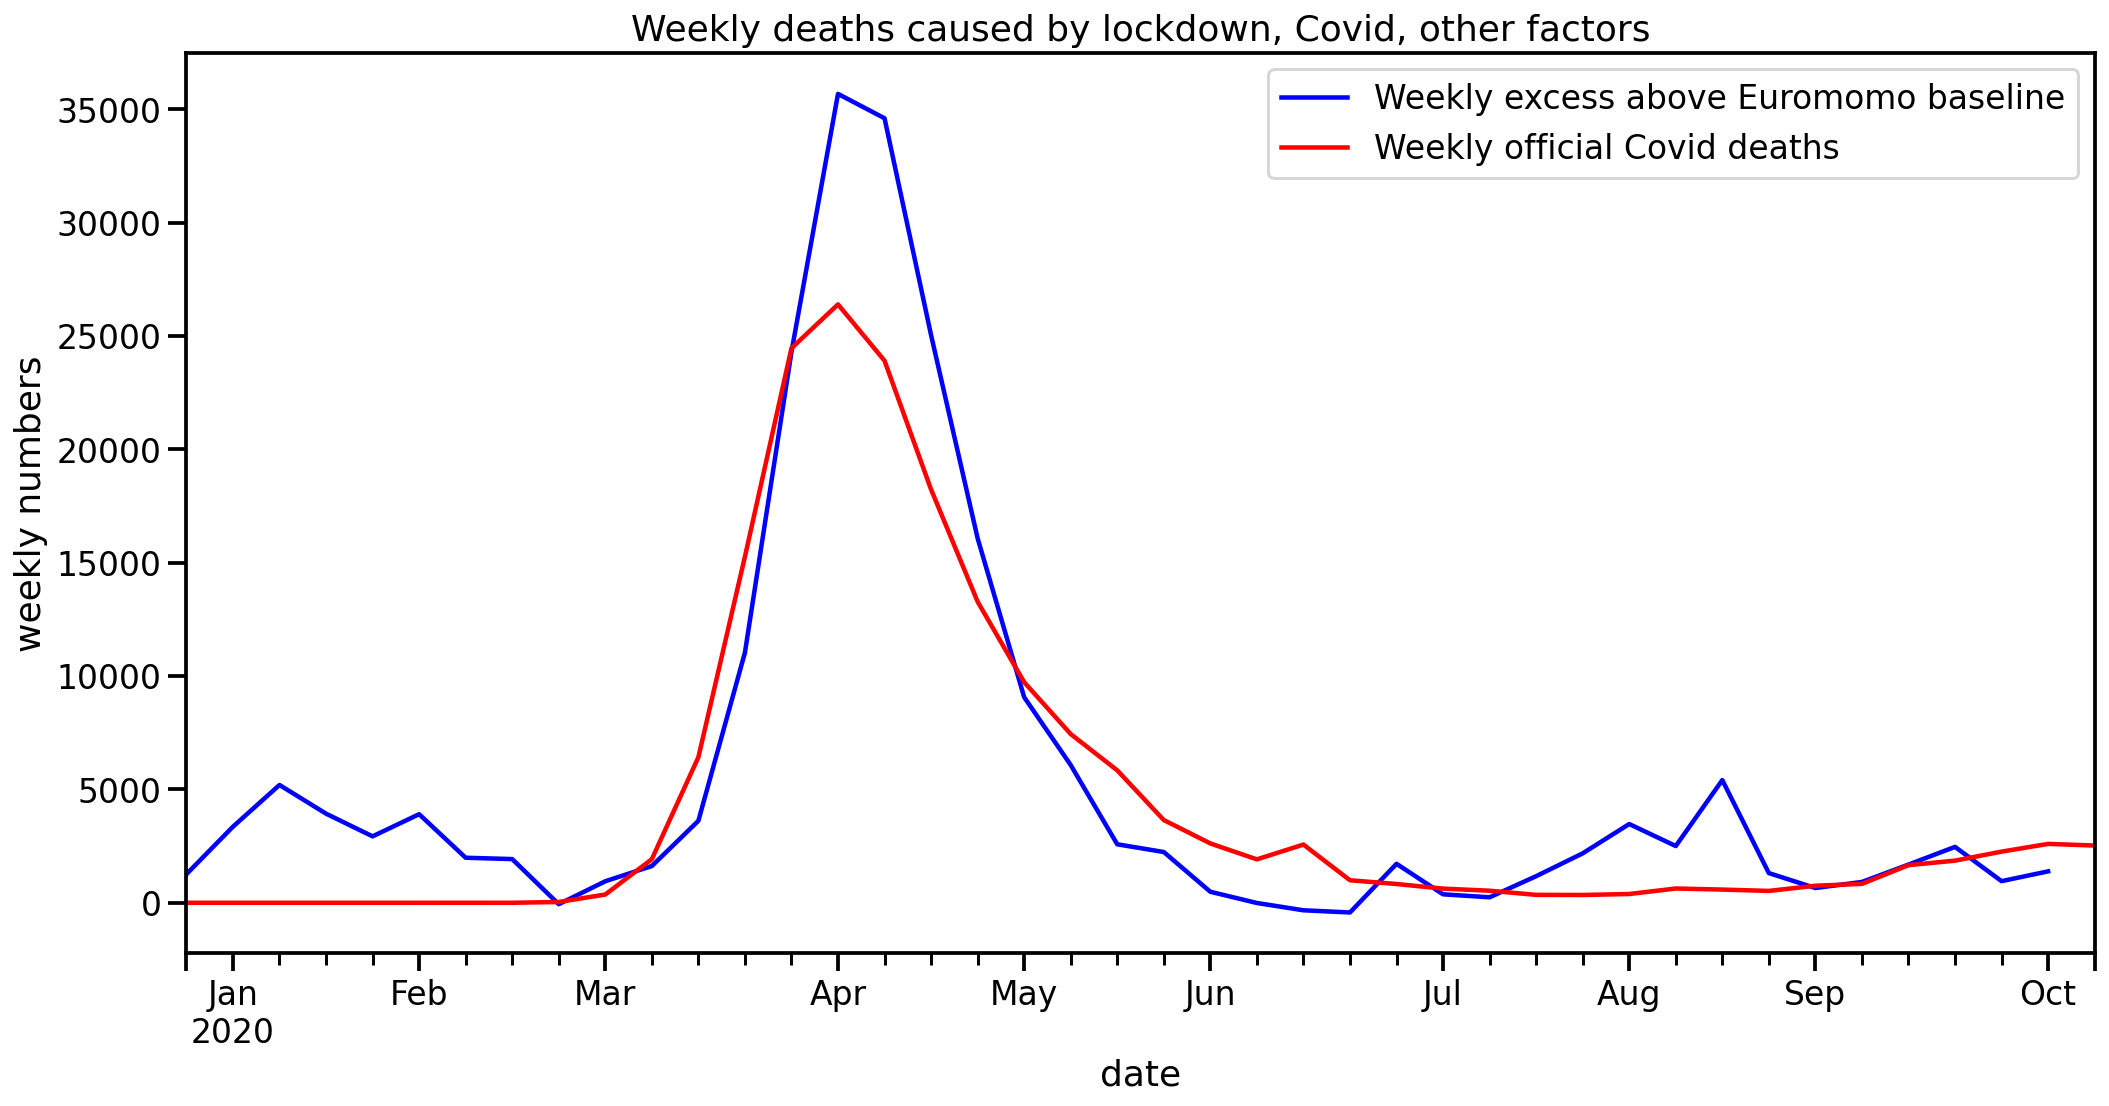

In [50]:
coviddeaths=data.deaths-data.noncovidbaseline
data['coviddeaths']=pd.Series(coviddeaths)


fig, ax = plt.subplots(figsize=(15, 8))
#data.iloc[index].plot(x='date',y='coviddeaths',label='Weekly excess above Euromomo baseline',ax=ax,color='blue')

index=data[data.date>=covidweekly.date.min()].index

data.iloc[index-1].plot(x='date',y='euromomoexcess',label='Weekly excess above Euromomo baseline',ax=ax,color='blue')



covidweekly.plot(x='date',y='deaths',label='Weekly official Covid deaths',ax=ax,color='red')


plt.legend()
plt.xlabel('date')# ,fontsize = 20)
plt.ylabel('weekly numbers')# ,fontsize = 20)
plt.title('Weekly deaths caused by lockdown, Covid, other factors')


fig.set_facecolor('w')
plt.tight_layout();
sns.despine;


plt.savefig('plots/weekly_deaths.jpg',dpi=250)

print(data.iloc[index-1].euromomoexcess.sum() - covid.deaths.sum())



In [51]:
def week2day(df):
    
    start=df.date.min()-timedelta(days=6)
    dailydeaths=pd.Series(np.array([np.repeat(x1/7,7) for x1 in df.deaths.values]).flatten(),name='dailydeaths').to_frame()
    dailybaseline=pd.Series(np.array([np.repeat(x1/7,7) for x1 in df.baseline.values]).flatten(),name='dailybaseline').to_frame()


    date=(pd.Series(pd.date_range(start=start,end=df.date.max()),name='date').to_frame()).reset_index(drop=True)

    df= date.join(dailydeaths)
    df=df.join(dailybaseline)
    
    df['dailyexcess']=df.dailydeaths-df.dailybaseline
    
    return df



df=week2day(data)
df['dailyexcesssmooth']=df.dailyexcess.rolling(7, win_type='gaussian').mean(std=2.5)

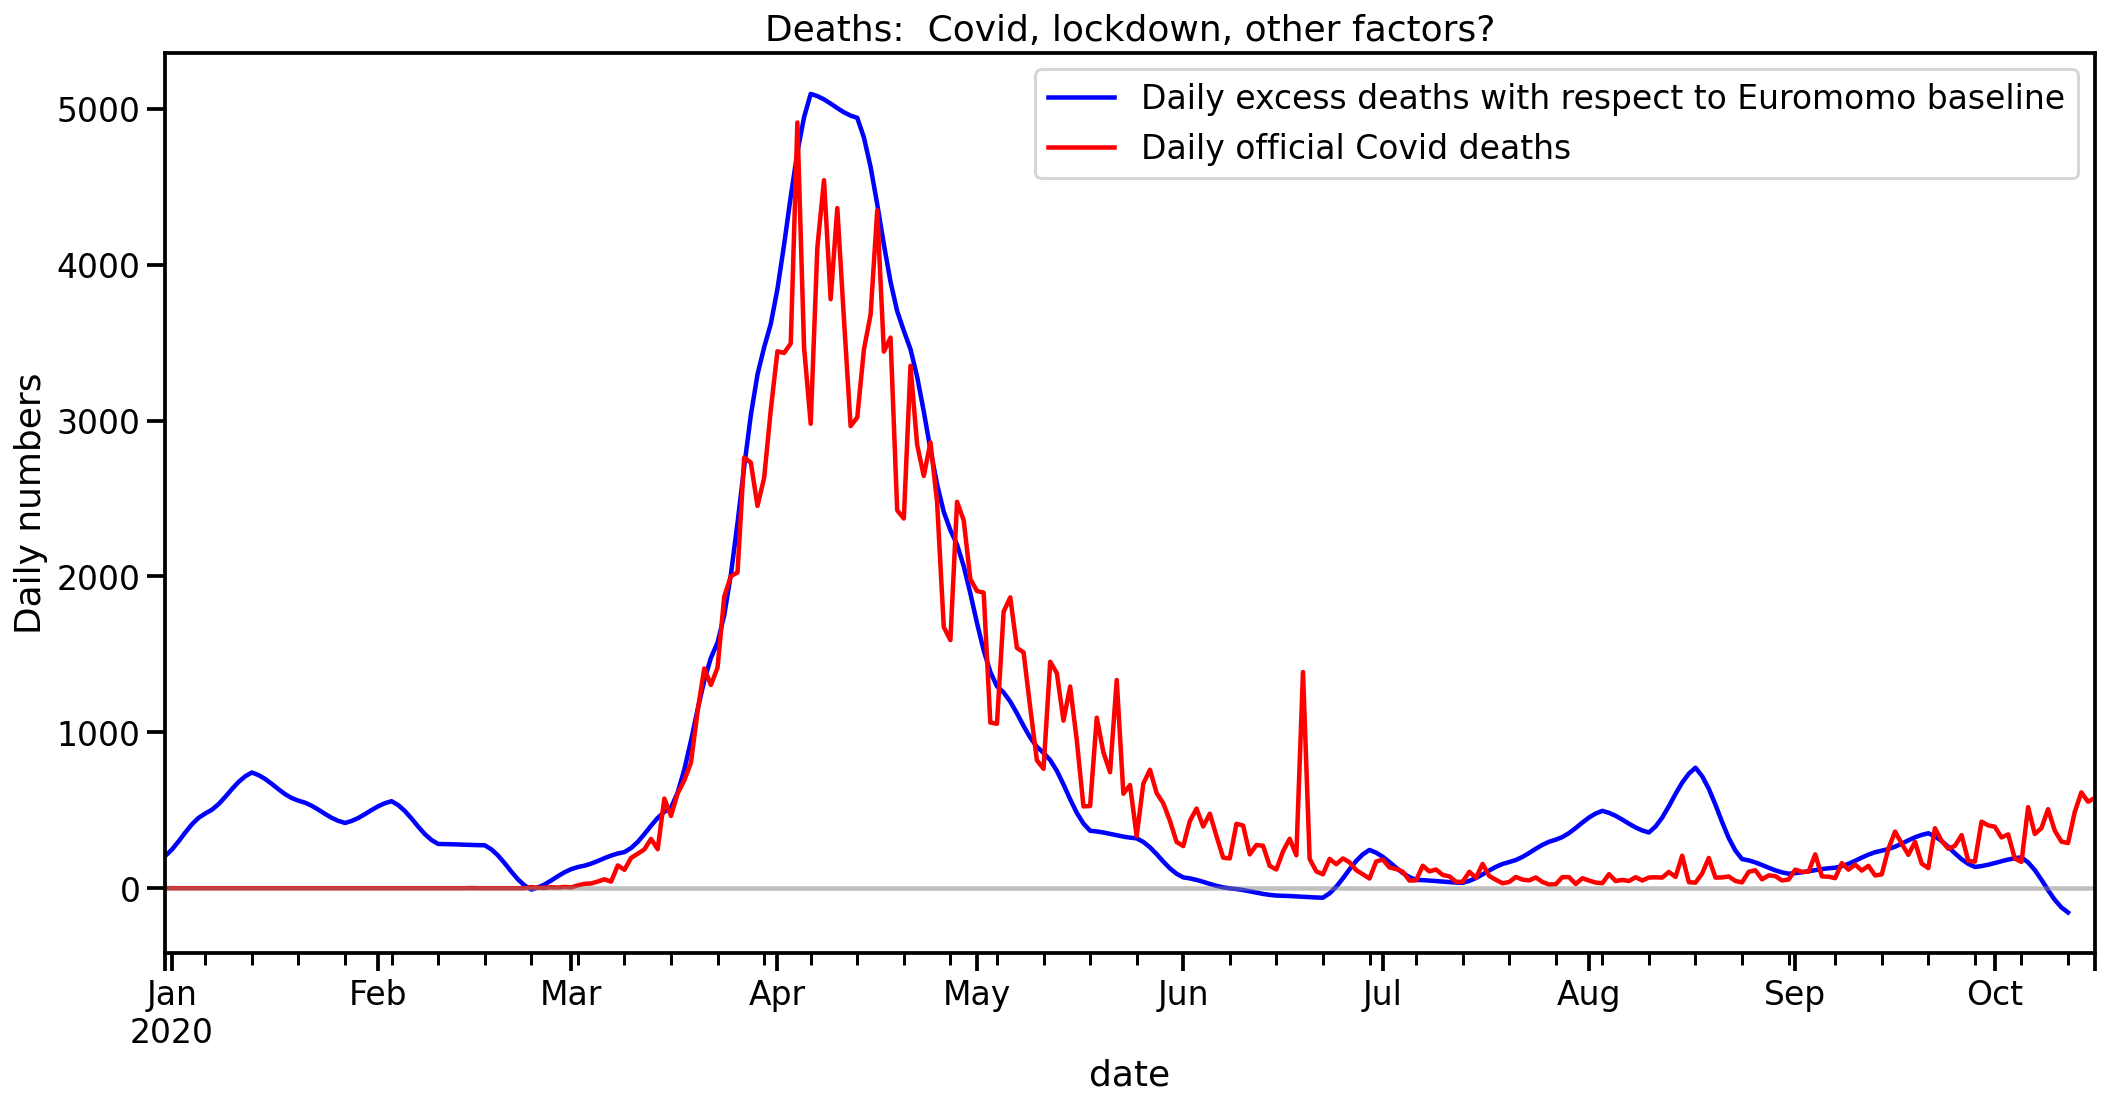

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))



index=df[df.date>=covid.date.min()].index

df.iloc[index].plot(x='date',y='dailyexcesssmooth',ax=ax,label='Daily excess deaths with respect to Euromomo baseline',color='blue')


covid.plot(x='date',y='deaths',ax=ax,label='Daily official Covid deaths',color='red')

plt.xlabel('date')# ,fontsize = 20)
plt.ylabel('Daily numbers')# ,fontsize = 20)
plt.axhline(0,color='gray',alpha=0.5)

plt.title('Deaths:  Covid, lockdown, other factors?')
#plt.title('EUROMOMO excess deaths during epidemic')

plt.legend()
fig.set_facecolor('w')
plt.tight_layout();
sns.despine;

plt.savefig('plots/Excess_v_Covid_smoothed.png',dpi=250)

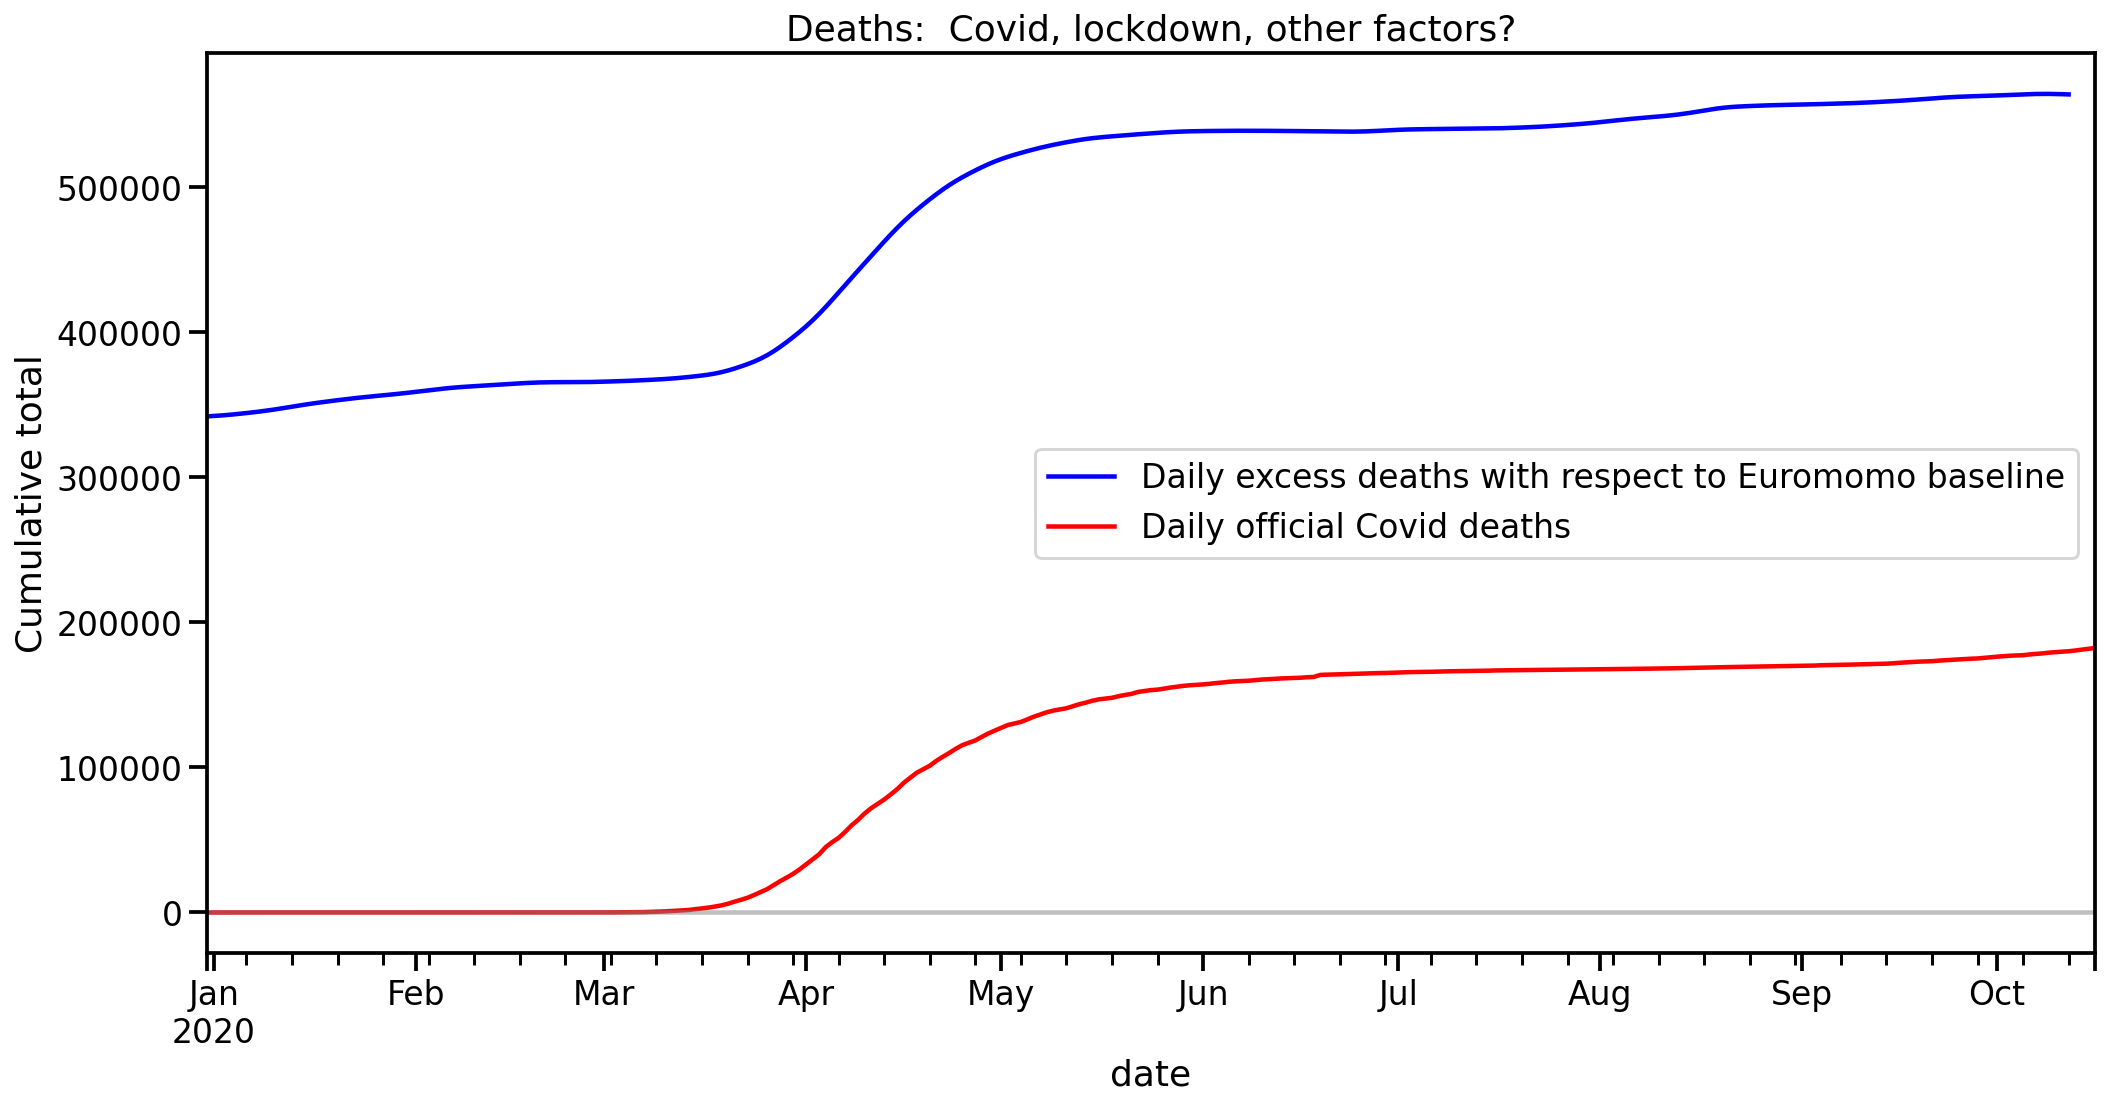

In [53]:
fig, ax = plt.subplots(figsize=(15, 8))

df['dailyexcesssmooth_cumulative']=df.dailyexcesssmooth.cumsum()
covid['deaths_cumulative']=covid.deaths.cumsum()


index=df[df.date>=covid.date.min()].index

df.iloc[index].plot(x='date',y='dailyexcesssmooth_cumulative',ax=ax,label='Daily excess deaths with respect to Euromomo baseline',color='blue')


covid.plot(x='date',y='deaths_cumulative',ax=ax,label='Daily official Covid deaths',color='red')

plt.xlabel('date')# ,fontsize = 20)
plt.ylabel('Cumulative total')# ,fontsize = 20)
plt.axhline(0,color='gray',alpha=0.5)

plt.title('Deaths:  Covid, lockdown, other factors?')


plt.legend()
fig.set_facecolor('w')
plt.tight_layout();
sns.despine;

plt.savefig('plots/Excess_v_Covid_smoothed_CUMULATIVE.png',dpi=250)

In [54]:
df2=pd.merge(df,covid,on='date',how='inner')
df2.dropna(inplace=True)
df2.rename(columns={'deaths':'coviddeaths'},inplace=True)
df2['noncoviddeaths']=df2.dailydeaths-df2.coviddeaths
df2['dailydeathssmooth']=df2.dailydeaths.rolling(7, win_type='gaussian').mean(std=2.5)
df2['noncoviddeathssmooth']=df2.dailydeathssmooth-df2.coviddeaths

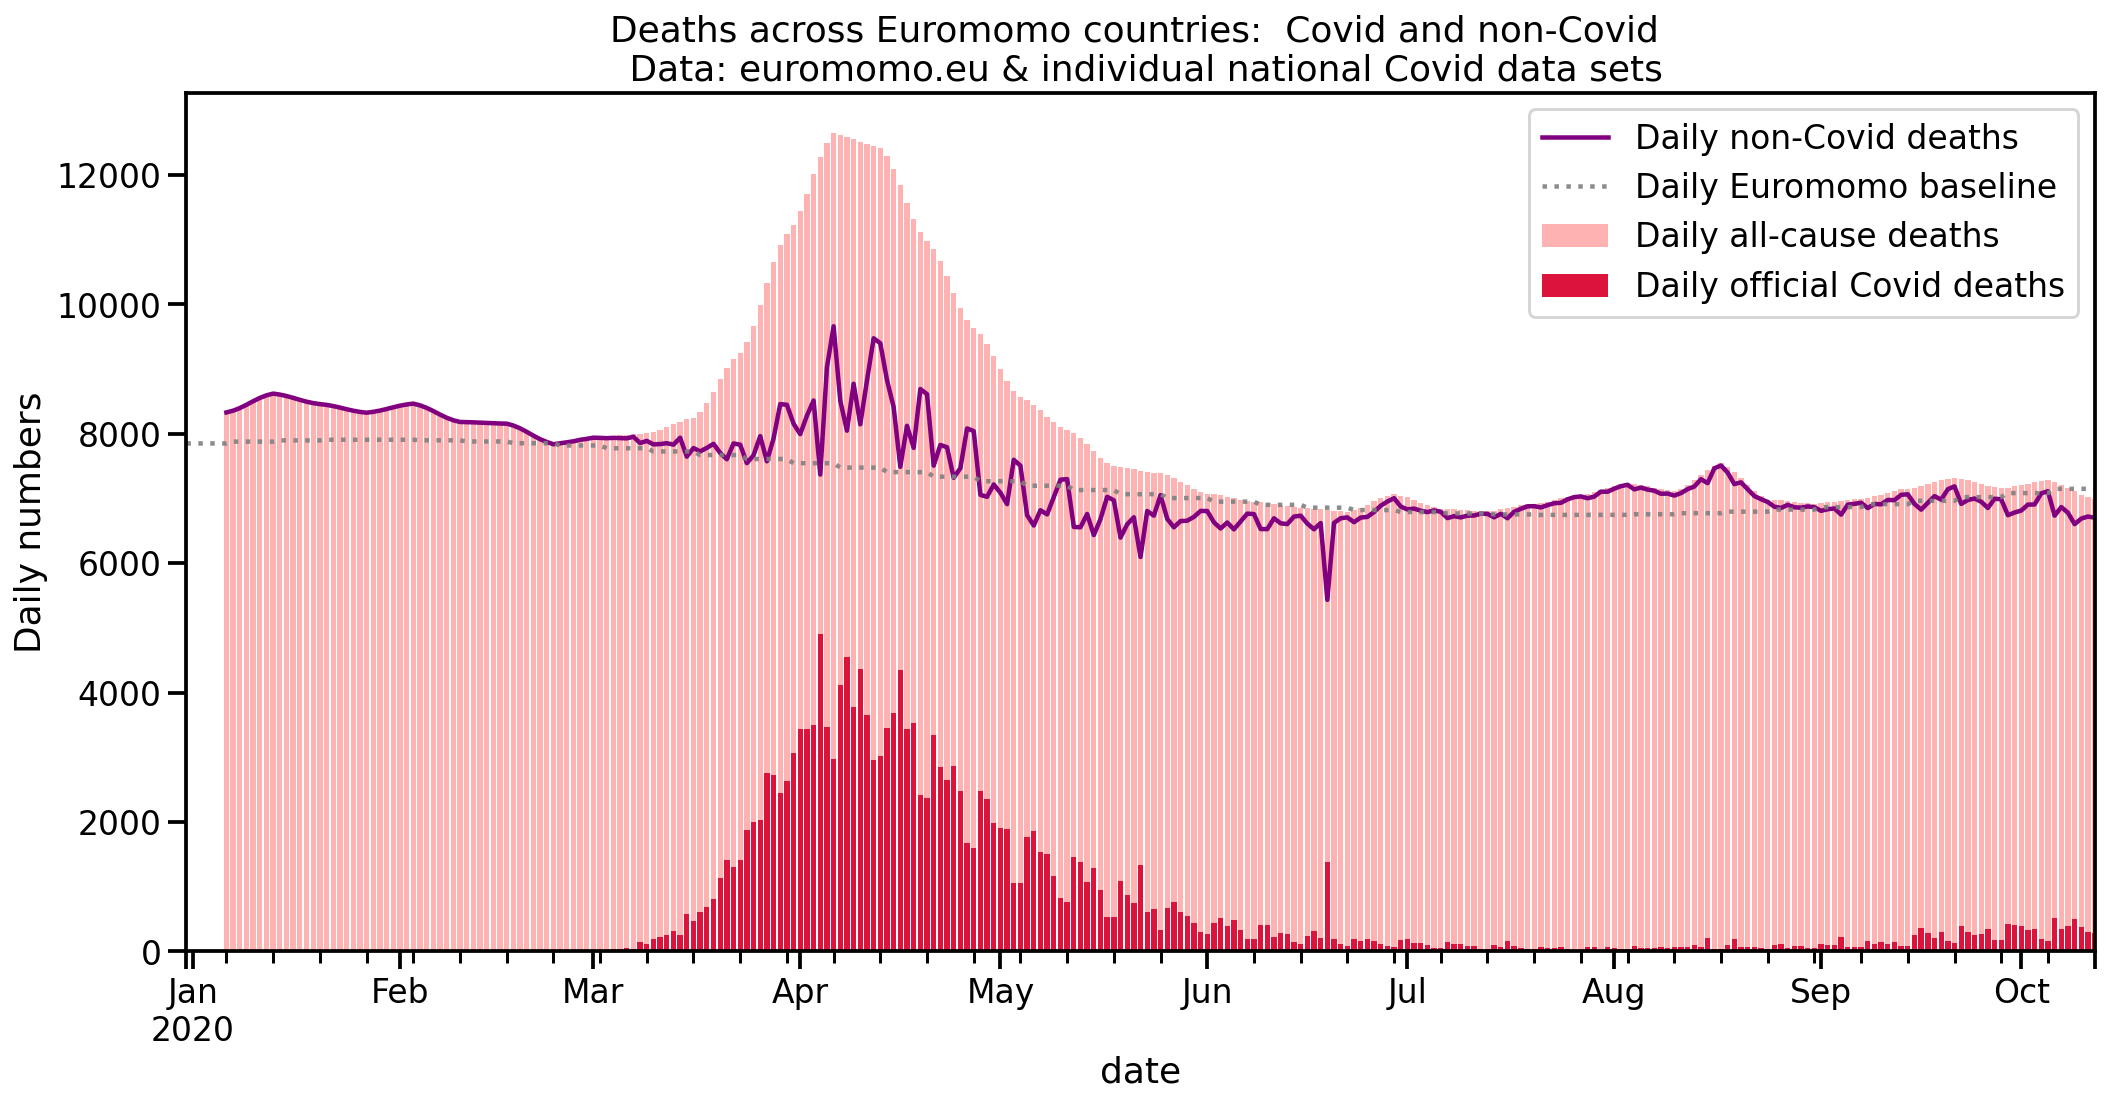

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))



#index=df[df.date>=covid.date.min()].index

#df.iloc[index].plot(x='date',y='dailyexcesssmooth',ax=ax,label='Daily excess deaths with respect to Euromomo baseline',color='blue')

ax.bar(df2.date,df2.dailydeathssmooth,label='Daily all-cause deaths',color='red',alpha=0.3)
ax.bar(df2.date,df2.coviddeaths,label='Daily official Covid deaths',color='crimson')

#df2.plot.bar(x='date',y='coviddeaths',ax=ax,label='Daily official Covid deaths',color='red')
df2.plot(x='date',y='noncoviddeathssmooth',ax=ax,label='Daily non-Covid deaths',color='purple')
df2.plot(x='date',y='dailybaseline',ax=ax,label='Daily Euromomo baseline',color='gray',alpha=0.9,linestyle=':')

plt.xlabel('date')# ,fontsize = 20)
plt.ylabel('Daily numbers')# ,fontsize = 20)


plt.title('Deaths across Euromomo countries:  Covid and non-Covid \n Data: euromomo.eu & individual national Covid data sets' )
#plt.title('EUROMOMO excess deaths during epidemic')

plt.legend()
fig.set_facecolor('w')
plt.tight_layout();
sns.despine;

plt.savefig('plots/EuromomoCovidnonCovid.png',dpi=250)